In [ ]:
# Notebook adapted from Jeremy P. Howard

In [ ]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


In [ ]:
def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.01

<p>Square error is square of difference between predicted and actual data values</p>
Define predicted: ${\hat y} $ and actual:${y}$ 
<p>Loss is:</p>
$({\hat y}-{y})^2$
<p>Previous definition y as linear_function</p>
${\hat y=\alpha + \beta x}$
<p>To minmize the Loss we take the derivative of the loss wrt alpha and beta, not x. x and y are datapoints
which is our dataset we are trying to fit to. The derivative of y is the sum of the partial derivatives of the dependent variables
which in this case are alpha and beta. </p>
<p></p>
$derivative(loss)=\cfrac{\partial(loss)}{\partial \alpha} + \cfrac{\partial(loss)}{\partial \beta}$
<p></p>
$\cfrac{\partial(loss)}{\partial \alpha}=\cfrac{(\hat y - y)^2}{\partial \alpha}=\cfrac{2*(\hat y-y)*\partial(\hat y - y)}{\partial \alpha}$
<p>Using:</p>
$\cfrac{\partial \hat y}{\partial \alpha}=1$ 
<p>and</p>
$\cfrac{\partial y}{\partial \alpha}=0$
<p>the derivative of loss wrt alpha for y-hat is:</p>
$\cfrac{\partial (loss)}{\partial \alpha}=2(\hat y-y)$
<p>The derivative of loss WRT beta starts as:</p>  
$\cfrac{\partial(loss)}{\partial \beta}=\cfrac{(\hat y - y)^2}{\partial \beta}=\cfrac{2*(\hat y-y)}{\partial \beta}*\cfrac{\partial(\hat y -y)}{\partial \beta}$
<p></p>
$\cfrac{\partial \hat y}{\partial \beta}=x$ and
$\cfrac{\partial y}{\partial \beta}=0$
<p>the derivative of loss wrt beta for y-hat is:</p>
$\cfrac{\partial (loss)}{\partial \beta}=2x*(\hat y-y)$


In [ ]:
def update_alpha_and_beta():
    global alpha, beta
    y_predicted = linear_function(alpha,beta,x)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x* derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
# i is the frame nuber!
#https://math.unice.fr/~hheumann/Tutorial/_build/intro_matplotlib.html
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,frames=np.arange(0,250),interval=100)

In [ ]:
# Comment out (or delete) the following command, which shows the animation in Jupyter Notebook, 
# if you want the mp4 saved to disk to be correctly animated. 
# (Alternatively, you can reset the values of alpha and beta to their initial values 
# after this command.)

resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('linear_animation.mp4', writer=writer)

In [ ]:
print('Done linear animation')

$y=\gamma x^2 + \beta x + \alpha$
<p></p>
$\cfrac{\partial(loss)}{\partial \gamma}=2x^2(\hat y-y)$
$\cfrac{\partial(loss)}{\partial \beta}=2x(\hat y -y)$
$\cfrac{\partial(loss)}{\partial \alpha}=2(\hat y-y)$


<h6>Squared Function</h6>

In [ ]:
#It doesnt make sense to use a quadratic to approximate a linear function,so change the dataset to 
#be quadratic
def square_function(gamma, beta, alpha,x):
    return gamma*x**2 + beta*x + alpha

beta_true = 2.0
alpha_true = 2.0
gamma_true = 10.0

n = 300
x = random(n)
y = square_function(gamma_true,beta_true,alpha_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
gamma = 2.
learning_rate = 0.01

In [ ]:
def update_squared():
    global gamma, alpha, beta
    y_predicted = square_function(gamma,beta,alpha,x)
    derivative_of_loss_wrt_gamma = 2*x**2*(y_predicted-y)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x* derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
    gamma = gamma - learning_rate * derivative_of_loss_wrt_gamma.mean()

def animate(i):
    x = np.linspace(0,1,100)
    y = square_function(gamma,beta,alpha,x)
    line.set_data(x,y)
    for i in range(20): 
        update_squared()
    return (line,)

In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [ ]:
#%matplotlib inline
resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('squared_animation.mp4', writer=writer)

In [ ]:
print('Done squared animation')

<h6>GD w/momentum</h6>

In [1]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


In [2]:
def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.01
initial_velocity=0.1

mom=0.9
v_alpha = 0
v_beta = 0

In [3]:
def update_alpha_and_beta():
    global alpha, beta,v_alpha,v_beta
    #more efficient code w/o the loop bc it is vectorized
    y_predicted = linear_function(alpha,beta,x)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x * derivative_of_loss_wrt_alpha
    v_alpha = mom*v_alpha - np.mean(learning_rate*derivative_of_loss_wrt_alpha)
    v_beta = mom*v_beta - np.mean(learning_rate*derivative_of_loss_wrt_beta)
    alpha = alpha + v_alpha
    beta = beta + v_beta
    
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

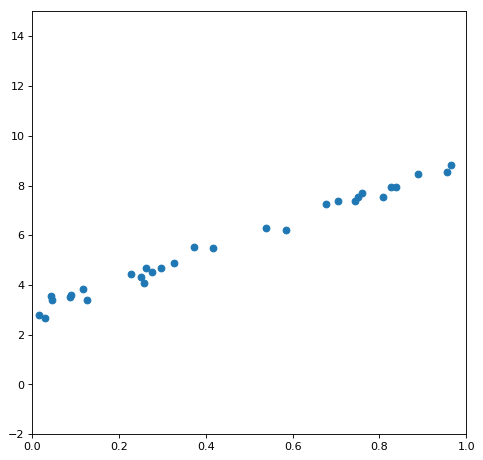

In [4]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [5]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [6]:
resulting_animation

In [7]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('GD_w_mom_animation.mp4', writer=writer)

<h6>Test Vectorized mean</h6>



In [ ]:
# nonvectorized version. do not do this. 
def update_alpha_and_beta():
    global alpha, beta,v_alpha,v_beta
    #more efficient code w/o the loop bc it is vectorized
    for i in range(n):
        y_predicted = linear_function(alpha,beta,x[i])
        derivative_of_loss_wrt_alpha = 2*(y_predicted-y[i])
        derivative_of_loss_wrt_beta = x[i] * derivative_of_loss_wrt_alpha
        v_alpha = mom*v_alpha - (1/n)*learning_rate*derivative_of_loss_wrt_alpha
        v_beta = mom*v_beta - (1/n)*learning_rate*derivative_of_loss_wrt_beta 
    alpha = alpha + v_alpha
    beta = beta + v_beta
    
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

In [ ]:
#all the code I see on blogs are wrong. Only JH got it right. 
import time
test = np.random.rand(100000000)

def vec_mean():
    start_time = time.time()
    test.mean()
    end_time = time.time()
    print("vec mean time:",end_time-start_time)
def nonvec_mean():
    start_time = time.time()
    sum=0.
    for i in range(len(test)):
        sum += test[i]
    mean = sum/len(test)
    end_time = time.time()
    print("nonvec mean time:",end_time-start_time)
    
vec_mean()
nonvec_mean()


<h6>Gradient Descent with Nesterov</h6>


<p>The Loss function replaces theta with theta_tilde </p>
$L(f(x^{(i)}); \tilde \theta,y^{(i)})$
<p>where theta_tilde is theta with a constant times velocity</p>
$\tilde \theta = \theta + \alpha v $
<p>To calculate the gradient g we need to compute the partial derivatives of the loss function</p>
$loss=(\hat y -\tilde y)$
<p>where we convert theta to theta_tilde by replacing all the parameters in the linear equation with tilde versions</p>
$y(\tilde \theta) = \tilde A x + \tilde B$ compared to before $y(\theta) = Ax+b$
<p>We changed notation from the earlier convention to avoid confusion with the IG defition of alpha as the
momentum coefficient vs. alpha defined as a theta parameter as before</p>
$Loss(\tilde \theta)=(\hat y -y(\tilde \theta))^2$
<p>Taking the partial derivatives of the loss WRT A and B which is the equivalent of taking the partials WRT alpha and beta earlier</p>
$\cfrac{\partial Loss(\tilde \theta)}{\partial A }=2(\hat y -y(\tilde \theta)) \cfrac{\partial (\tilde y - y(\tilde \theta))}{\partial A}=2(\hat y -y(\tilde \theta))(-x) $
<p></p>
$\cfrac{\partial Loss(\tilde \theta)}{\partial B }= 2(\hat y -y(\tilde \theta)) \cfrac{\partial (\tilde y - y(\tilde \theta))}{\partial B}=2(\hat y -y(\tilde \theta))(-1) $
<p>Converting the expectations to mean</p>
$\cfrac{\partial Loss(\tilde \theta)}{\partial A} = \cfrac{-2}{N}\sum_{1}^{N}x(\hat y - y(\theta))=\cfrac{2}{N}\sum_{1}^{N}x(y(\theta)-\hat y)$
<p></p>
$\cfrac{\partial Loss(\tilde \theta)}{\partial B }= \cfrac{-2}{N}\sum_{1}^{N}(\hat y - y(\theta))=\cfrac{2}{N}\sum_{1}^{N}(y(\theta)-\hat y)$
<p></p>



In [ ]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc

def linear_function(alpha,beta,x): 
    return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.01


mom=0.9
v_alpha = 0
v_beta = 0
alpha_tilde=0
beta_tilde=0
loss = []
num_times=0
loss = []

In [ ]:
def update_alpha_and_beta():
    global alpha, beta,v_alpha,v_beta
    #interim update
    alpha_tilde = alpha + mom*v_alpha
    beta_tilde = beta + mom*v_beta
    
    y_predicted = linear_function(alpha_tilde,beta_tilde,x)
    derivative_of_loss_wrt_alpha_theta_tilde = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta_theta_tilde = x * derivative_of_loss_wrt_alpha_theta_tilde
    #gradient update
    v_alpha = mom*v_alpha - learning_rate*derivative_of_loss_wrt_alpha_theta_tilde.mean()
    v_beta = mom*v_beta - learning_rate*derivative_of_loss_wrt_beta_theta_tilde.mean()
    #velocity update
    alpha = alpha + v_alpha
    beta = beta + v_beta
    l = (linear_function(alpha,beta,x)-y)**2
    loss.append(l)
def animate(i):
    global num_times
    num_times +=1
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

In [ ]:
for _ in range(250):
    update_alpha_and_beta()
    print("alpha:",alpha," beta:",beta)
print(loss)

In [ ]:
print(len(loss))
x_axis=np.arange(0,250)
plt.plot(x_axis,loss)
plt.show()

In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [ ]:
resulting_animation

In [ ]:
print(num_times)

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('Nesterov_animation.mp4', writer=writer)

<h6>Ada Optimization</h6>

In [ ]:
import numpy as np
import math
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.04

#epsilon
epsilon=0.9
#r
r_alpha = 0
r_beta = 0
delta = 10**(-7)


In [ ]:
def update_alpha_and_beta():
    global alpha, beta
    r_alpha=0
    r_beta=0 
    y_predicted = linear_function(alpha,beta,x)
    #gradient
    g_alpha  = 2*(y_predicted-y)
    g_beta = x * g_alpha
    #accumulate squared gradient
    r_alpha = r_alpha + np.multiply(g_alpha.mean(),g_alpha.mean())
    r_beta = r_beta + np.multiply(g_beta.mean(),g_beta.mean())
    #print(type(r_alpha))
    #print(type(g_alpha))
    print(g_alpha.mean())
    delta_alpha =  -np.multiply(epsilon/(delta+math.sqrt(r_alpha),g_alpha.mean()))
    delta_beta = -np.multiply(epsilon/(delta+math.sqrt(r_beta)),g_beta.mean())
    #velocity update
    alpha = alpha + delta_alpha.mean()
    beta = beta + delta_beta.mean()
    #print("alpha:",alpha," beta:",beta)
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(300): 
        update_alpha_and_beta()
    return (line,)

In [ ]:

update_alpha_and_beta()


In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,500),interval=100)

In [ ]:
resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('ada_animation.mp4', writer=writer)

<h6>Adam</h6>

In [ ]:
import numpy as np
import math
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.01

#step size
epsilon=0.001
#p1,p1
p1 = 0.9
p2 = 0.999
delta = 10**(-8)
s_alpha=0
s_beta=0
r_alpha=0
r_beta=0


In [ ]:
def update_alpha_and_beta():
    global s_alpha, s_beta,r_alpha,r_beta, alpha,beta
    for t in range(10):
        for i in range(n):
            y_predicted = linear_function(alpha,beta,x[i])
            g_alpha  = (2/n)*(y_predicted-y[i])
            g_beta = x[i] * g_alpha
        #accumulate squared gradient
        t+=1
        s_alpha = p1*s_alpha + (1-p1)*g_alpha
        s_beta = p1*s_beta + (1-p1)*g_beta
        r_alpha = p2*r_alpha + (1-p2)*np.multiply(g_alpha,g_alpha)
        r_beta = p2*r_beta + (1-p2)*np.multiply(g_beta,g_beta)
        s_hat_alpha = s_alpha/(1-p1**t) 
        s_hat_beta =  s_beta/(1-p1**t)
        r_hat_alpha = r_alpha/(1-p2**t)
        r_hat_beta = r_beta/(1-p2**t)
        delta_alpha = -epsilon*s_hat_alpha/(math.sqrt(r_hat_alpha)+delta) 
        delta_beta = -epsilon*s_hat_beta/(math.sqrt(r_hat_beta)+delta) 
        alpha += delta_alpha
        beta += delta_beta
    
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [ ]:
resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('adam_animation.mp4', writer=writer)